# Propensity Modelling

* Building a propensity to buy model on the [Online Shoppers Purchasing Intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) data set.

**Let's first import all the necessaray python modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

**Now, let's read the data and then perform some EDA**

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


In [3]:
df.shape

(12330, 18)

In [4]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Encoding Categorical Features

* Categorical Variables Month, Weekend and Revenue are encoded using **Label Encoding**
* Another categorical variable Visitor type is encoded using **One-Hot Encoding**

In [6]:
label_encoder = LabelEncoder()
df['Month_cat'] = label_encoder.fit_transform(df['Month']).astype('float64')

In [7]:
df.drop('Month',axis=1,inplace=True)

In [8]:
df['Month_cat'].value_counts()

6.0    3364
7.0    2998
5.0    1907
1.0    1727
8.0     549
9.0     448
0.0     433
3.0     432
4.0     288
2.0     184
Name: Month_cat, dtype: int64

In [9]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [10]:
df['Weekend']=label_encoder.fit_transform(df['Weekend']).astype('float64')
df['Revenue']=label_encoder.fit_transform(df['Revenue']).astype('float64')

In [11]:
visi=pd.get_dummies(df, 'VisitorType')
visi.head().T

,0,1,2,3,4
Administrative,0.0,0.0,0.0,0.000000,0.00
Administrative_Duration,0.0,0.0,0.0,0.000000,0.00
Informational,0.0,0.0,0.0,0.000000,0.00
Informational_Duration,0.0,0.0,0.0,0.000000,0.00
ProductRelated,1.0,2.0,1.0,2.000000,10.00
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.50
BounceRates,0.2,0.0,0.2,0.050000,0.02
ExitRates,0.2,0.1,0.2,0.140000,0.05
PageValues,0.0,0.0,0.0,0.000000,0.00
SpecialDay,0.0,0.0,0.0,0.000000,0.00


In [12]:
df=visi

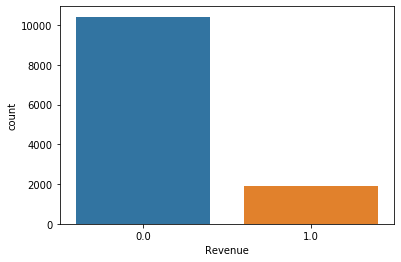

In [13]:
sns.countplot(x='Revenue',data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

## Feature Selection

* Removing correlated and insignificant features from the data set
* Using **Backward Elimination** feature selection method for removing insignificant features

In [15]:
corr=df.corr()
corr.head().T

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087
Informational,0.376850,0.302710,1.000000,0.618955,0.374164
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958


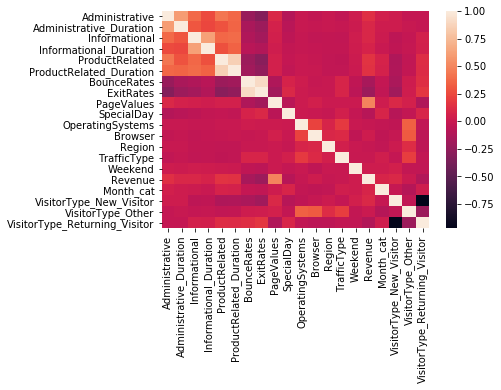

In [16]:
sns.heatmap(df.corr())

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

In [18]:
sel_cols=df.columns[columns]
sel_cols.shape

(18,)

In [19]:
df=df[sel_cols]

In [20]:
feats=list(df.columns)
feats.pop(13)

'Revenue'

In [21]:
df_=df.drop('Revenue',axis=1)

In [22]:
import statsmodels.api as sm

In [23]:
selected_columns = feats
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                   
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(df_.iloc[:,:].values, df['Revenue'], SL, selected_columns)

In [24]:
res=pd.DataFrame()

In [25]:
res['Revenue']=df['Revenue'].copy()

In [26]:
df = pd.DataFrame(data = data_modeled, columns = selected_columns)

## Splitting into training and testing data

* Here we are splitting our data into 70% as training and 30% as testing data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(df.values,res.values,test_size=0.3,random_state=42)

* To avoid the dominance of features having higher numeric ranges over features with small numeric ranges, we scale all the features to the same range(mostly 0-1)
* We are using StandardScaler class for scaling the features

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler=StandardScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)
X_test=preprocessing.scale(X_test)

## Developing the model

* To build the propensity model, here we are using Logistic regression model.
* Before actually building the model, let's check the significance of the features and still if there are insignificant features we will proceed with building the model only after removing them.
* To check the significance, here we are using the p-value as threshold, considering features with p-value>0.05 as insignificant

In [30]:
log=sm.Logit(Y_train.ravel(),X_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.528913
         Iterations 7


In [31]:
print(log.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8631
Model:                          Logit   Df Residuals:                     8622
Method:                           MLE   Df Model:                            8
Date:                Mon, 03 May 2021   Pseudo R-squ.:                 -0.2291
Time:                        13:42:05   Log-Likelihood:                -4565.1
converged:                       True   LL-Null:                       -3714.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1402      0.031     -4.541      0.000      -0.201      -0.080
x2             0.0143      0.028      0.508      0.611      -0.041       0.070
x3             0.1678      0.028      5.919      0.0

In [32]:
df.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month_cat', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [33]:
df_ =df.drop(['Informational','VisitorType_New_Visitor'],axis=1)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(df_.values,res.values,test_size=0.3,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler=StandardScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)
X_test=preprocessing.scale(X_test)

In [36]:
log=sm.Logit(Y_train.ravel(),X_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.528952
         Iterations 7


In [37]:
print(log.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8631
Model:                          Logit   Df Residuals:                     8624
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 May 2021   Pseudo R-squ.:                 -0.2292
Time:                        13:42:06   Log-Likelihood:                -4565.4
converged:                       True   LL-Null:                       -3714.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1359      0.030     -4.558      0.000      -0.194      -0.077
x2             0.1708      0.028      6.194      0.000       0.117       0.225
x3            -0.0553      0.027     -2.045      0.0

* Now we are left with the most significant features, so we can proceed with building the model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()

In [40]:
df.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month_cat', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [41]:
lr.fit(X_scaled,Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating the Model

* Now we are done with training the model, now it's time to evaluate the model.
* This is not a perfect classification model, this is a propensity model, so we can't use ROC curve or Confusion matrix to evaluate the model but we are using **Decile Analysis**.

In [42]:
prob_tr=lr.predict_proba(X_train)

In [43]:
prob_tst=lr.predict_proba(X_test)

In [44]:
prob_tst

array([[0.88464881, 0.11535119],
       [0.86191659, 0.13808341],
       [0.76826081, 0.23173919],
       ...,
       [0.97798978, 0.02201022],
       [0.05618518, 0.94381482],
       [0.90621508, 0.09378492]])

In [45]:
prob_tr

array([[0.63975036, 0.36024964],
       [0.5348296 , 0.4651704 ],
       [0.22359678, 0.77640322],
       ...,
       [0.46679197, 0.53320803],
       [0.05924075, 0.94075925],
       [0.08521526, 0.91478474]])

In [46]:
probs=[]
for i in range(len(list(prob_tr))):
    probs.append(prob_tr[i][1])

In [47]:
probs_tst=[]
for i in range(len(list(prob_tst))):
    probs_tst.append(prob_tst[i][1])

In [48]:
len(probs_tst), len(probs)

(3699, 8631)

In [49]:
conc=pd.DataFrame()

In [50]:
len(probs)

8631

In [51]:
conc=pd.DataFrame()
conc['Probs']=probs_tst
conc['Class']=Y_test
class_0= conc[conc['Class']==0]['Probs']
class_1=conc[conc['Class']==1]['Probs']

In [52]:
con=0
pairs=0
for i in class_0:
    for j in class_1:
        if j>=i:
            con+=1
        pairs+=1
print(con)
print(pairs)
print('Concordance =',con/pairs)

1599773
1796300
Concordance = 0.8905934420753772


In [53]:
dec_rank=pd.qcut(probs,10,labels=False,duplicates='drop')

In [54]:
dec_rank_tst=pd.qcut(probs_tst,10,labels=False,duplicates='drop')

In [55]:
train=pd.DataFrame()
train['probs']=probs
train['dec_rank']=dec_rank

In [56]:
test=pd.DataFrame()
test['probs']=probs_tst
test['dec_rank']=dec_rank_tst

In [57]:
train['index']=range(8631)

In [58]:
test['index']=range(3699)

In [59]:
train.probs.max()

1.0

In [60]:
test.probs.max()

0.9999999995426718

In [61]:
train['dec_rank'].value_counts()

8    1726
0     866
7     863
6     863
5     863
4     863
3     863
2     863
1     861
Name: dec_rank, dtype: int64

In [62]:
test['dec_rank'].value_counts()

3    371
9    370
7    370
1    370
8    370
6    370
2    370
0    370
5    369
4    369
Name: dec_rank, dtype: int64

In [63]:
dec_lst , ind_lst=[],[]
for i in range(2,11):
    dec,ind = train[train['dec_rank']==10-i]['probs'],train[train['dec_rank']==10-i]['index']
    dec_lst.append(dec)
    ind_lst.append(ind)

In [64]:
dec_lst_tst, ind_lst_tst=[],[]
for i in range(1,11):
    dec,ind = test[test['dec_rank']==10-i]['probs'],test[test['dec_rank']==10-i]['index']
    dec_lst_tst.append(dec)
    ind_lst_tst.append(ind)

In [65]:
len(Y_train)

8631

In [66]:
dec_lst_len=[]
for i in dec_lst:
    dec_lst_len.append(len(i))
dec_lst_len

[1726, 863, 863, 863, 863, 863, 863, 861, 866]

In [67]:
dec_lst_len_tst=[]
for i in dec_lst_tst:
    dec_lst_len_tst.append(len(i))
dec_lst_len_tst

[370, 370, 370, 370, 369, 369, 371, 370, 370, 370]

In [68]:
Y_train_df=pd.DataFrame()

Y_test_df=pd.DataFrame()

Y_test_df["Y_test"]=Y_test.ravel()

Y_train_df['Y_train']=Y_train.ravel()

Y_train_df['index']=range(8631)

Y_test_df['index']=range(3699)

In [69]:
Resp_all=[]

Resp_all_tst=[]

In [70]:
for j in range(9):
    Resp=[]
    for i in ind_lst[j]:
        Resp.append(Y_train_df[Y_train_df['index']==i]['Y_train'])
    Resp_all.append(Resp)

In [71]:
for j in range(10):
    Resp=[]
    for i in ind_lst_tst[j]:
        Resp.append(Y_test_df[Y_test_df['index']==i]['Y_test'])
    Resp_all_tst.append(Resp)

In [72]:
buyers,buyers_tst=[],[]

In [73]:
for j in range(9):
    c=0
    for i in Resp_all[j]:
        if (i==1).bool():
            c+=1
    buyers.append(c)

In [74]:
for j in range(10):
    c=0
    for i in Resp_all_tst[j]:
        if (i==1).bool():
            c+=1
    buyers_tst.append(c)



In [75]:
dec_tr=pd.DataFrame()

In [76]:
dec_tst=pd.DataFrame()

In [77]:
dec_tr['Decile']=range(9)

In [78]:
dec_tst['Decile']=range(10)


In [79]:
dec_tr['No.Of Customers']=dec_lst_len


In [80]:
dec_tst['No.Of Customers']=dec_lst_len_tst

dec_tr['No.Of Buyers'] = buyers

dec_tst["No.Of Buyers"]=buyers_tst

In [81]:
per=[]
for i in range(len(buyers)):
    per.append(buyers[i]/dec_lst_len[i])

per_tst=[]
for i in range(len(buyers_tst)):
    per_tst.append(buyers_tst[i]/dec_lst_len_tst[i])

dec_tr['Percent of buyers']=per

In [82]:
dec_tr['Percent of buyers']=per
dec_tst["Percent of buyers"]=per_tst

In [83]:
dec_tr

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers
0,0,1726,929,0.538239
1,1,863,195,0.225956
2,2,863,58,0.067207
3,3,863,32,0.037080
4,4,863,34,0.039397
5,5,863,19,0.022016
6,6,863,27,0.031286
7,7,861,25,0.029036
8,8,866,14,0.016166


In [84]:
dec_tst

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers
0,0,370,261,0.705405
1,1,370,158,0.427027
2,2,370,66,0.178378
3,3,370,31,0.083784
4,4,369,15,0.040650
5,5,369,10,0.027100
6,6,371,18,0.048518
7,7,370,7,0.018919
8,8,370,8,0.021622
9,9,370,1,0.002703


In [85]:
cum_buyers=[]
cum_buyers.append(buyers[0])
for k in range(1,len(buyers)):
    cum_buyers.append(cum_buyers[k-1]+buyers[k])


cum_buyers_tst=[]
cum_buyers_tst.append(buyers_tst[0])
for k in range(1,len(buyers_tst)):
    cum_buyers_tst.append(cum_buyers_tst[k-1]+buyers_tst[k])

In [86]:
dec_tr["Cummulative buyers"]=cum_buyers

dec_tst["Cummulative Buyers"]=cum_buyers_tst

In [87]:
dec_tr

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers,Cummulative buyers
0,0,1726,929,0.538239,929
1,1,863,195,0.225956,1124
2,2,863,58,0.067207,1182
3,3,863,32,0.037080,1214
4,4,863,34,0.039397,1248
5,5,863,19,0.022016,1267
6,6,863,27,0.031286,1294
7,7,861,25,0.029036,1319
8,8,866,14,0.016166,1333


In [88]:
dec_tst

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers,Cummulative Buyers
0,0,370,261,0.705405,261
1,1,370,158,0.427027,419
2,2,370,66,0.178378,485
3,3,370,31,0.083784,516
4,4,369,15,0.040650,531
5,5,369,10,0.027100,541
6,6,371,18,0.048518,559
7,7,370,7,0.018919,566
8,8,370,8,0.021622,574
9,9,370,1,0.002703,575


In [89]:
cum_per=[]
for i in range(9):
    cum_per.append(cum_buyers[i]/1333)

cum_per_tst=[]
for i in range(10):
    cum_per_tst.append(cum_buyers_tst[i]/575)

In [90]:
dec_tr['Cummulative Percent']=cum_per

dec_tst['Cummulative Percent']=cum_per_tst

In [91]:
dec_tr

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers,Cummulative buyers,Cummulative Percent
0,0,1726,929,0.538239,929,0.696924
1,1,863,195,0.225956,1124,0.843211
2,2,863,58,0.067207,1182,0.886722
3,3,863,32,0.037080,1214,0.910728
4,4,863,34,0.039397,1248,0.936234
5,5,863,19,0.022016,1267,0.950488
6,6,863,27,0.031286,1294,0.970743
7,7,861,25,0.029036,1319,0.989497
8,8,866,14,0.016166,1333,1.000000


Let us check the decile table of training data(above table).
We can see that 1st decile contains 69% of total buyers, 2nd decile contains 84% of the total buyers, 3rd decile contains 88% of total buyers. That means only top 30% of the total observations contains 88% of our buyers. So, company can concentrate on just 30% of total people for their marketing campaigns etc. So, they don’t need to waste their time and resources for the other 70% people.

In [92]:
dec_tst

,Decile,No.Of Customers,No.Of Buyers,Percent of buyers,Cummulative Buyers,Cummulative Percent
0,0,370,261,0.705405,261,0.453913
1,1,370,158,0.427027,419,0.728696
2,2,370,66,0.178378,485,0.843478
3,3,370,31,0.083784,516,0.897391
4,4,369,15,0.040650,531,0.923478
5,5,369,10,0.027100,541,0.940870
6,6,371,18,0.048518,559,0.972174
7,7,370,7,0.018919,566,0.984348
8,8,370,8,0.021622,574,0.998261
9,9,370,1,0.002703,575,1.000000


Similarly, you can analyze the test data decile table also.